In [141]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

    Для обробки було взято датасет 429 спостережень за 6 ознаками, серед яких є результуюча змінна ActualPower, значення якої буде оцінюватися різними моделями на основі 5 інших, незалежних змінних.

In [142]:
# Importing the dataset
df=pd.read_csv('Control 6 (Tomilovych, EC-61).csv', sep=';', decimal=',')
df

,ActualPower,Max Capacity,Location 4,Location 5,Location 6,Location 8
0,15.568,42.5,7.932,5.845,6.479,5.247
1,15.091,42.5,8.186,5.838,6.569,5.192
2,13.599,42.5,8.388,5.835,6.629,5.133
3,15.921,42.5,8.534,5.838,6.669,5.064
4,16.830,42.5,8.599,5.637,6.716,5.066
...,...,...,...,...,...,...
424,2.067,45.0,7.573,5.108,8.007,7.616
425,1.981,45.0,7.514,5.047,7.936,7.487
426,1.919,45.0,7.447,4.963,7.859,7.363
427,1.867,45.0,7.368,4.843,7.756,7.218


    Усі вхідні дані є числовими змінними. Вони мають піддатися попередній обробці для їхньої можливості застосування в моделях: оброблення викидів і пропущених значень, а також, у разі потреби, шкалюванню.
    Але для початку перенесемо результуючу змінну ActualPower у кінець датафрейму для подальшого полегшення праці з даними (наприклад, аби індекси факторних змінних у датафреймі та вибірці незалежних змінних мали один і той же індекс), а також розглянемо описову статистику даних.

In [143]:
# Moving variable 'ActualPower' in the end of dataframe
ActualPower=df['ActualPower']
df.drop('ActualPower', axis=1, inplace=True)
df['ActualPower']=ActualPower
df

,Max Capacity,Location 4,Location 5,Location 6,Location 8,ActualPower
0,42.5,7.932,5.845,6.479,5.247,15.568
1,42.5,8.186,5.838,6.569,5.192,15.091
2,42.5,8.388,5.835,6.629,5.133,13.599
3,42.5,8.534,5.838,6.669,5.064,15.921
4,42.5,8.599,5.637,6.716,5.066,16.830
...,...,...,...,...,...,...
424,45.0,7.573,5.108,8.007,7.616,2.067
425,45.0,7.514,5.047,7.936,7.487,1.981
426,45.0,7.447,4.963,7.859,7.363,1.919
427,45.0,7.368,4.843,7.756,7.218,1.867


In [144]:
# Descriptive Statistics
df.describe()

,Max Capacity,Location 4,Location 5,Location 6,Location 8,ActualPower
count,426.000000,427.000000,429.000000,429.000000,427.000000,428.000000
mean,43.676056,7.104923,5.153186,6.690548,5.734386,13.305460
std,1.098042,2.342717,1.634063,2.340924,2.125642,9.254245
min,41.000000,0.936000,0.116000,0.822000,0.677000,0.000000
25%,42.500000,5.464000,4.295000,4.751000,4.001000,6.842250
50%,43.750000,7.647000,5.397000,6.920000,5.487000,11.920500
75%,45.000000,8.572500,6.425000,8.591000,7.842000,18.548000
max,45.000000,11.761000,7.716000,11.399000,9.875000,39.859000


    Побудуємо графіки розподілу значень змінних для перевірки їх відповідності закону нормального розподілу.

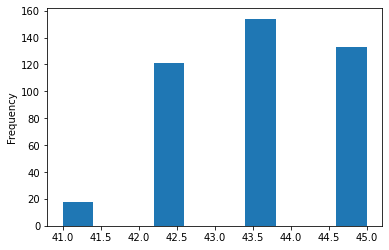

In [145]:
# Max Capacity distribution
df['Max Capacity'].plot(kind='hist')

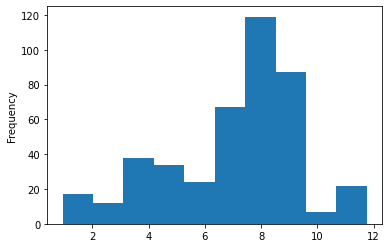

In [146]:
# Location 4 distribution
df['Location 4'].plot(kind='hist')

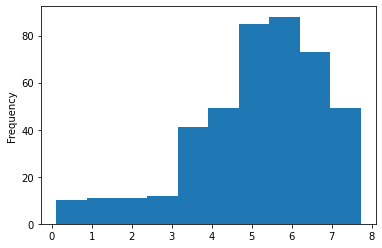

In [147]:
# Location 5 distribution
df['Location 5'].plot(kind='hist')

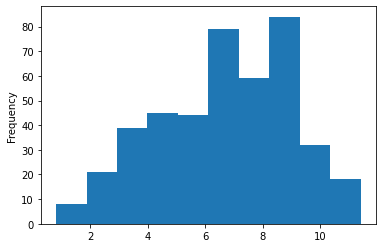

In [148]:
# Location 6 distribution
df['Location 6'].plot(kind='hist')

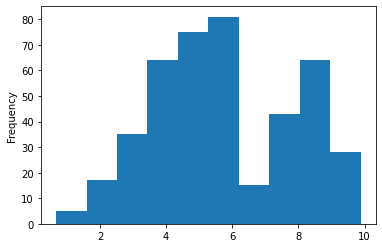

In [149]:
# Location 8 distribution
df['Location 8'].plot(kind='hist')

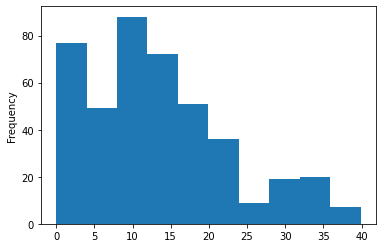

In [150]:
# ActualPower distribution
df['ActualPower'].plot(kind='hist')

    З розглянутих графіків можна побачити, що відсутні спостереження, які можна трактувати як помилки, а графіки є досить симетричними і близькими до нормального розподілу, а тому для них можна розглядати як викиди ті значення змінних, що не потрапляють в інтервал середнє значення±3 стандартні відхилення. Максимальним і мінімальним викидам буде присвоєно відповідно максимальне і мінімальне значення, що входить в цей інтервал.

In [151]:
# Outliers
print('OUTLIERS:')
j=0

capacities=[]
i=0
for capacity in df['Max Capacity']:
    if capacity>round(df['Max Capacity'].mean()+3*df['Max Capacity'].std(), 1):
        capacity=round(df['Max Capacity'].mean()+3*df['Max Capacity'].std(), 1)
        i=i+1
    elif capacity<round(df['Max Capacity'].mean()-3*df['Max Capacity'].std(), 1):
        capacity=round(df['Max Capacity'].mean()-3*df['Max Capacity'].std(), 1)
        i=i+1
    capacities.append(capacity)
print('Max Capacity: '+str(i))
j=j+i
df['Max Capacity']=capacities

locations4=[]
i=0
for location4 in df['Location 4']:
    if location4>round(df['Location 4'].mean()+3*df['Location 4'].std(), 3):
        location4=round(df['Location 4'].mean()+3*df['Location 4'].std(), 3)
        i=i+1
    elif location4<round(df['Location 4'].mean()-3*df['Location 4'].std(), 3):
        location4=round(df['Location 4'].mean()-3*df['Location 4'].std(), 3)
        i=i+1
    locations4.append(location4)
print('Location 4: '+str(i))
j=j+i
df['Location 4']=locations4

locations5=[]
i=0
for location5 in df['Location 5']:
    if location5>round(df['Location 5'].mean()+3*df['Location 5'].std(), 3):
        location5=round(df['Location 5'].mean()+3*df['Location 5'].std(), 3)
        i=i+1
    elif location5<round(df['Location 5'].mean()-3*df['Location 5'].std(), 3):
        location5=round(df['Location 5'].mean()-3*df['Location 5'].std(), 3)
        i=i+1
    locations5.append(location5)
print('Location 5: '+str(i))
j=j+i
df['Location 5']=locations5

locations6=[]
i=0
for location6 in df['Location 6']:
    if location6>round(df['Location 6'].mean()+3*df['Location 6'].std(), 3):
        location6=round(df['Location 6'].mean()+3*df['Location 6'].std(), 3)
        i=i+1
    elif location6<round(df['Location 6'].mean()-3*df['Location 6'].std(), 3):
        location6=round(df['Location 6'].mean()-3*df['Location 6'].std(), 3)
        i=i+1
    locations6.append(location6)
print('Location 6: '+str(i))
j=j+i
df['Location 6']=locations6

locations8=[]
i=0
for location8 in df['Location 8']:
    if location8>round(df['Location 8'].mean()+3*df['Location 8'].std(), 3):
        location8=round(df['Location 8'].mean()+3*df['Location 8'].std(), 3)
        i=i+1
    elif location8<round(df['Location 8'].mean()-3*df['Location 8'].std(), 3):
        location8=round(df['Location 8'].mean()-3*df['Location 8'].std(), 3)
        i=i+1
    locations8.append(location8)
print('Location 8: '+str(i))
j=j+i
df['Location 8']=locations8


powers=[]
i=0
for power in df['ActualPower']:
    if power>round(df['ActualPower'].mean()+3*df['ActualPower'].std(), 3):
        power=round(df['ActualPower'].mean()+3*df['ActualPower'].std(), 3)
        i=i+1
    elif power<round(df['ActualPower'].mean()-3*df['ActualPower'].std(), 3):
        power=round(df['ActualPower'].mean()-3*df['ActualPower'].std(), 3)
        i=i+1
    powers.append(power)
print('ActualPower: '+str(i))
j=j+i
df['ActualPower']=powers

print('GRAND TOTAL '+str(j))

OUTLIERS:
Max Capacity: 0
Location 4: 0
Location 5: 2
Location 6: 0
Location 8: 0
ActualPower: 0
GRAND TOTAL 2


    Можна побачити, що всього було виявлено та усунено 2 викидів, що не є значним числом порівняно з загальним числом усіх значень кількісних змінних, а отже пророблена зверху процедура допомогла позбутися викидів, але не спотворила початкових значень даних у значній мірі. Далі можна перейти до обробки відсутніх значень.

In [152]:
# Descriptive Statistics
df.describe()

,Max Capacity,Location 4,Location 5,Location 6,Location 8,ActualPower
count,426.000000,427.000000,429.000000,429.000000,427.000000,428.000000
mean,43.676056,7.104923,5.153578,6.690548,5.734386,13.305460
std,1.098042,2.342717,1.632871,2.340924,2.125642,9.254245
min,41.000000,0.936000,0.251000,0.822000,0.677000,0.000000
25%,42.500000,5.464000,4.295000,4.751000,4.001000,6.842250
50%,43.750000,7.647000,5.397000,6.920000,5.487000,11.920500
75%,45.000000,8.572500,6.425000,8.591000,7.842000,18.548000
max,45.000000,11.761000,7.716000,11.399000,9.875000,39.859000


In [153]:
# Cheking NaN
nan_by_column=df.isnull().sum()
print(nan_by_column)

Max Capacity    3
Location 4      2
Location 5      0
Location 6      0
Location 8      2
ActualPower     1
dtype: int64


    Можна побачити, що число пропущених значень невелике, а отже їх можна заповнити, не спотворюючи початкові значення даних у значній мірі. Пропущеним значенням буде присвоєно середнє значення відповідної ознаки.

In [154]:
# Taking care of missing data
from sklearn.impute import SimpleImputer

df[['Max Capacity']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Max Capacity']])
df[['Max Capacity']]=round(df[['Max Capacity']], 1)

df[['Location 4']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Location 4']])
df[['Location 4']]=round(df[['Location 4']], 3)

df[['Location 8']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['Location 8']])
df[['Location 8']]=round(df[['Location 8']], 3)

df[['ActualPower']]=SimpleImputer(missing_values=np.nan, strategy='mean').fit_transform(df[['ActualPower']])
df[['ActualPower']]=round(df[['ActualPower']], 3)

In [155]:
# Descriptive Statistics
df.describe()

,Max Capacity,Location 4,Location 5,Location 6,Location 8,ActualPower
count,429.000000,429.000000,429.000000,429.000000,429.000000,429.000000
mean,43.692075,7.104923,5.153578,6.690548,5.734385,13.305459
std,1.099908,2.337237,1.632871,2.340924,2.120670,9.243428
min,41.000000,0.936000,0.251000,0.822000,0.677000,0.000000
25%,42.500000,5.476000,4.295000,4.751000,4.013000,6.843000
50%,43.800000,7.641000,5.397000,6.920000,5.488000,11.972000
75%,45.000000,8.566000,6.425000,8.591000,7.829000,18.508000
max,45.000000,11.761000,7.716000,11.399000,9.875000,39.859000


    Після попередньої обробки даних можна переходити до побудови моделі. Спочатку розглянемо лінійні реграсії, а саме однофакторну лінійну регресію, багатофакторну лінійну регресію з усіма факторними змінними, поліноміальну лінійну регресію, а також багатофакторну лінійну регресію з оптимальним набором аргументів, відібраних з використанням методу зворотного виключення Backward Elimination.
    Для цього дані для побудови моделей буде розділено на навчальну та тестову вибірку, аби перевірити прогнозні якості моделей. Для перевірки якості апроксимації та прогнозу моделями будуть використовуватися такі метрики як коефіцієнт детермінації R^2 та cередньоквадратична помилка MSE.

    Почнемо з побудови однофакторної лінійної регресії. Для цього спочатку побудуємо кореляційну матрицю даних, за якою визначимо аргумент, що найбільше корелює зі резулютуючою змінною.

In [156]:
# Cheking correlations
df.corr()

,Max Capacity,Location 4,Location 5,Location 6,Location 8,ActualPower
Max Capacity,1.000000,-0.045783,-0.115366,0.000690,0.076716,0.259882
Location 4,-0.045783,1.000000,0.881444,0.953708,0.816989,0.380901
Location 5,-0.115366,0.881444,1.000000,0.802813,0.682452,0.287975
Location 6,0.000690,0.953708,0.802813,1.000000,0.942442,0.408534
Location 8,0.076716,0.816989,0.682452,0.942442,1.000000,0.392771
ActualPower,0.259882,0.380901,0.287975,0.408534,0.392771,1.000000


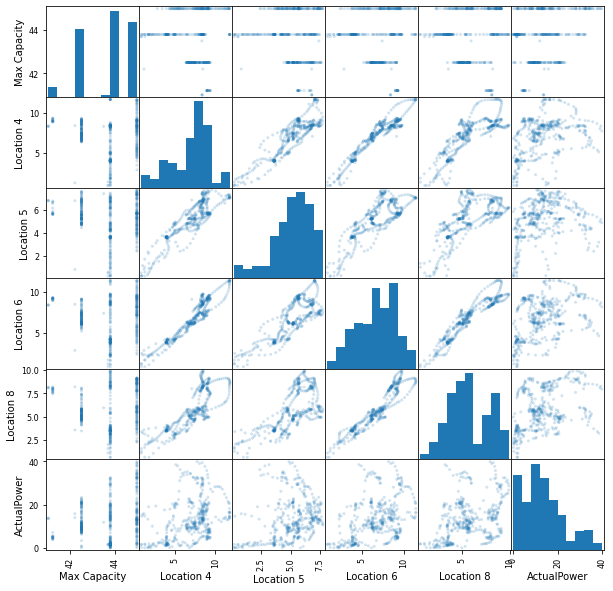

In [157]:
# Visualising correlations
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha=0.2, figsize=(10, 10))
plt.show()

    Найбільший коефіцієнт кореляції з залежною змінною має змінна Location 6, проте він складає лише 0,409; що є досить низьким показником. Також можна побачити, що всі незалежні змінні мають доволі низький коефіцієнт кореляції з залежною змінною, але більшість мають високу кореляцію між собою.

    Для перевірки прогнозних якостей моделей спостереження були розбиті на навчальну (75%) і тестову (25%) вибірки. Оцінка параметрів моделі буде буде проводитися на навчальній вибірці, а для перевірки прогнозних якостей моделі буде використано тестову вибірку.

In [158]:
# Splitting the dataset into the Training set and Test set
y=df.iloc[:, 5:6].values
X=df.iloc[:, 0:5].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=123)

    Оцінимо параметри однофакторної лінійної регресії та виведемо значення цих оцінок, проведемо прогноз за ними, розрахуємо метрики якості моделі та графічно відобразимо результати моделі порівняно з реальними значеннями.

In [159]:
# Fitting Simple Linear Regression to the Training set (Location 6)
from sklearn.linear_model import LinearRegression
sr=LinearRegression().fit(X_train[:, 3:4], y_train)

In [160]:
# Getting parameters
sr.coef_, sr.intercept_

(array([[1.72525336]]), array([1.37812965]))

In [161]:
# Predicting the Test set results
y_pred=sr.predict(X_test[:, 3:4])

In [162]:
# Coefficient of determination R^2
training_score=[]
training_score.append(sr.score(X_train[:, 3:4], y_train))
test_score=[]
test_score.append(sr.score(X_test[:, 3:4], y_test))
sr.score(X_train[:, 3:4], y_train), sr.score(X_test[:, 3:4], y_test)

(0.2094565744892497, 0.05866256106026402)

In [163]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
training_mse=[]
training_mse.append(mean_squared_error(y_train, sr.predict(X_train[:, 3:4])))
test_mse=[]
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, sr.predict(X_train[:, 3:4])), mean_squared_error(y_test, y_pred)

(61.6757405492978, 99.63319580074338)

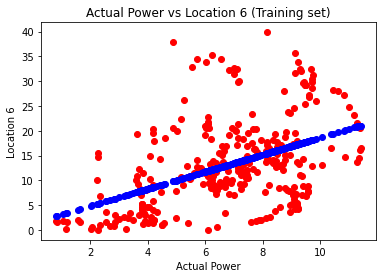

In [164]:
# Visualising the Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], sr.predict(X_train[:, 3:4]), 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

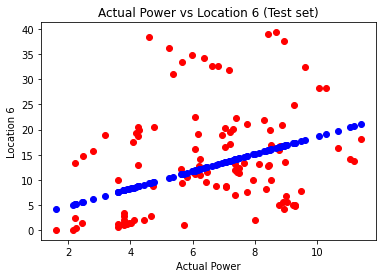

In [165]:
# Visualising the Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], sr.predict(X_test[:, 3:4]), 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

    Оцінимо параметри багатофакторної лінійної регресії за всіма факторами та виведемо значення цих оцінок, проведемо прогноз за ними, розрахуємо метрики якості моделі та графічно відобразимо результати моделі порівняно з реальними значеннями, а також виведемо p-значення для перевірки значущості оцінок параметрів у моделі.

In [166]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
mr=LinearRegression().fit(X_train, y_train)

In [167]:
# Getting parameters
mr.coef_, mr.intercept_

(array([[ 1.76802700e+00,  6.57662621e-02, -1.53340798e-03,
          1.80355378e+00, -1.74950545e-01]]),
 array([-75.85464652]))

In [168]:
# Predicting the Test set results
y_pred=mr.predict(X_test)

In [169]:
# Coefficient of determination R^2
training_score.append(mr.score(X_train, y_train))
test_score.append(mr.score(X_test, y_test))
mr.score(X_train, y_train), mr.score(X_test, y_test)

(0.2562834737904407, 0.16544750833206567)

In [170]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
training_mse.append(mean_squared_error(y_train, mr.predict(X_train)))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, mr.predict(X_train)), mean_squared_error(y_test, y_pred)

(58.02245143344381, 88.33084542138639)

In [171]:
# p-values
import statsmodels.api as sm
X_const=sm.add_constant(X_train)
mr1=sm.OLS(y_train, X_const).fit()
print(mr1.pvalues)
mr1.summary()

[3.23186274e-05 2.18079467e-05 9.62621837e-01 9.98127627e-01
 3.74679772e-01 8.78977829e-01]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     21.71
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           1.12e-18
Time:                        22:24:59   Log-Likelihood:                -1107.2
No. Observations:                 321   AIC:                             2226.
Df Residuals:                     315   BIC:                             2249.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -75.8546     17.985     -4.218      0.000    -111.241     -40.468
x1             1.7680      0.410      4.310      0.000       0.961       2.575
x2             0.0658      1.402      0.047      0.963      -2.693       2.825
x3            -0.0015      0.653     -0.002      0.998      -1.286       1.283
x4             1.8036      2.029      0.889      0.375      -2.188       5.795
x5            -0.1750      1.148     -0.152      0.879      -2.434       2.084
==============================================================================
Omnibus:                       20.737   Durbin-Watson:                   1.948
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.959
Skew:                           0.644   Prob(JB):                     1.03e-05
Kurtosis:                       3.244   Cond. No.                     1.91e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

    З p-значень можна побачити, що значущими параметрами з рівнем значущості 0,05 є тільки вільний член та коефіцієнт при першій змінній Max Capacity. Багатофакторну лінійну регресію зі значущими змінними буде побудовано згодом за допоиогою методу зворотного виключення Backward Elimination.

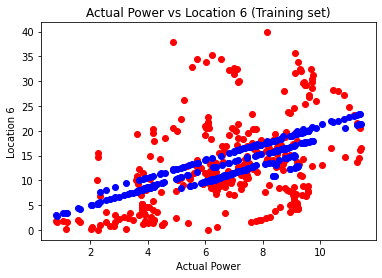

In [172]:
# Visualising the Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], mr.predict(X_train), 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

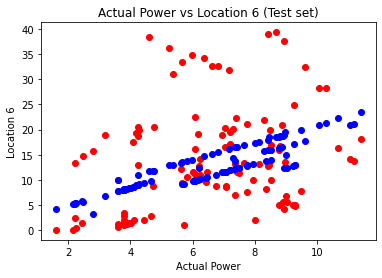

In [173]:
# Visualising the Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], mr.predict(X_test), 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

    Також побудуємо полінімальну лінійну регресію другого ступеня, розглянувши окрім значень змінної Location 6, що найбільш корелює з результуючою змінною, також її квадрат. Для цього оцінимо її параметри та виведемо значення цих оцінок, проведемо прогноз за ними, розрахуємо метрики якості моделі та графічно відобразимо результати моделі порівняно з реальними значеннями.

In [174]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
X_train_p=PolynomialFeatures().fit_transform(X_train[:, 3:4])
X_test_p=PolynomialFeatures().fit_transform(X_test[:, 3:4])
pr=LinearRegression().fit(X_train_p[:, 1:], y_train)

In [175]:
# Getting parameters
pr.coef_, pr.intercept_

(array([[ 3.40513979, -0.1315941 ]]), array([-3.24233277]))

In [176]:
# Predicting the Test set results
y_pred=pr.predict(X_test_p[:,1:])

In [177]:
# Coefficient of determination R^2
training_score.append(pr.score(X_train_p[:,1:], y_train))
test_score.append(pr.score(X_test_p[:, 1:], y_test))
pr.score(X_train_p[:,1:], y_train), pr.score(X_test_p[:, 1:], y_test)

(0.21842017656050372, 0.08314724202687895)

In [178]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
training_mse.append(mean_squared_error(y_train, pr.predict(X_train_p[:, 1:])))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, pr.predict(X_train_p[:, 1:])), mean_squared_error(y_test, y_pred)

(60.97642818024403, 97.0416840729052)

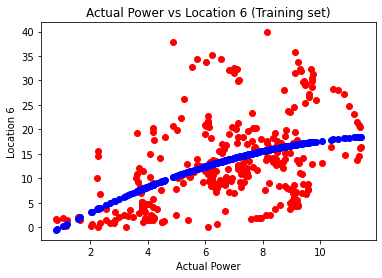

In [179]:
# Visualising the Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], pr.predict(X_train_p[:, 1:]), 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

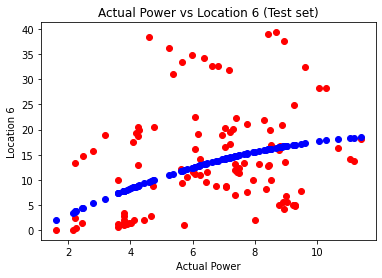

In [180]:
# Visualising the Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], pr.predict(X_test_p[:, 1:]), 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

    Далі побудуємо багатофакторну лінійну модель зі значущими параметрами з рівнем значущості 0,05. Для їх визначення використаємо метод зворотного виключення (Backward Elimination). Після цього оцінимо параметри багатофакторної лінійної регресії за значущими факторами та виведемо значення цих оцінок, проведемо прогноз за ними, розрахуємо метрики якості моделі та графічно відобразимо результати моделі порівняно з реальними значеннями, а також виведемо p-значення для перевірки значущості оцінок параметрів у моделі.

In [181]:
# Backward Elimination with p-values
import statsmodels.api as sm
def backwardElimination(x, sl):
    numVars=len(x[0])
    for i in range(0, numVars):
        regressor_OLS=sm.OLS(y, x).fit()
        maxVar=max(regressor_OLS.pvalues).astype(float)
        if maxVar>sl:
            for j in range(0, numVars-i):
                if (regressor_OLS.pvalues[j].astype(float)==maxVar):
                    x=np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
         
SL=0.05
X_opt=X_train[:, 0:5]
y=y_train
X_Modeled=backwardElimination(X_opt, SL)
print(len(X_Modeled[0]))
print(X_Modeled)

2
[[ 4.038  3.54 ]
 [ 7.932  5.247]
 [ 6.574  3.6  ]
 [ 2.407  1.096]
 [ 8.462  8.392]
 [ 9.055  8.589]
 [ 8.305  8.954]
 [ 8.418  8.731]
 [ 8.668  5.47 ]
 [ 1.349  0.689]
 [ 8.216  7.783]
 [ 5.     2.885]
 [11.761  8.657]
 [ 8.962  5.734]
 [ 4.273  3.989]
 [ 4.001  3.573]
 [ 8.157  9.357]
 [ 6.531  4.099]
 [ 9.526  5.809]
 [ 8.355  8.066]
 [10.845  9.061]
 [ 4.029  3.504]
 [ 9.399  8.671]
 [ 8.426  5.573]
 [ 2.135  2.448]
 [ 9.051  5.649]
 [ 8.471  8.286]
 [10.714  6.242]
 [ 4.035  3.557]
 [ 8.363  8.811]
 [ 6.557  5.309]
 [ 4.124  3.82 ]
 [ 9.006  7.862]
 [11.753  8.576]
 [ 4.074  4.025]
 [ 8.671  4.741]
 [ 7.105  7.992]
 [ 4.745  2.557]
 [ 0.936  1.133]
 [ 9.114  8.699]
 [ 8.501  5.517]
 [ 7.847  5.974]
 [ 4.435  3.683]
 [ 4.243  3.537]
 [ 6.43   4.089]
 [ 8.411  5.595]
 [ 4.238  3.872]
 [ 8.418  5.688]
 [ 8.722  4.985]
 [ 9.115  7.941]
 [ 7.111  5.137]
 [ 8.474  8.257]
 [ 2.805  2.702]
 [ 5.372  3.423]
 [ 8.32   7.973]
 [ 7.1    5.069]
 [ 7.476  4.758]
 [ 8.538  8.461]
 [ 8.934  8.

In [182]:
# Comparing columns of X_train and X_Modeled
opt_columns=[]
for opt_column in range(len(X_Modeled[0])):
    for column in range(len(X_train[0])):
        if np.array_equal(X_Modeled[:, opt_column], X_train[:, column]):
            opt_columns.append(column)
print(len(opt_columns))
print(opt_columns)
for column in df.iloc[:, opt_columns].columns:
    print(column)

2
[1, 4]
Location 4
Location 8


In [183]:
# Fitting Optimized Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
omr=LinearRegression().fit(X_train[:, opt_columns], y_train)

In [184]:
# Getting parameters
omr.coef_, omr.intercept_

(array([[0.80191964, 1.11780197]]), array([0.79756865]))

In [185]:
# Predicting the Test set results
y_pred=omr.predict(X_test[:, opt_columns])

In [186]:
# Coefficient of determination R^2
training_score.append(omr.score(X_train[:, opt_columns], y_train))
test_score.append(omr.score(X_test[:, opt_columns], y_test))
omr.score(X_train[:, opt_columns], y_train), omr.score(X_test[:, opt_columns], y_test)

(0.21008599755933666, 0.05034983156876438)

In [187]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
training_mse.append(mean_squared_error(y_train, omr.predict(X_train[:, opt_columns])))
test_mse.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, omr.predict(X_train[:, opt_columns])), mean_squared_error(y_test, y_pred)

(61.62663491801468, 100.51303311604028)

In [188]:
# p-values
import statsmodels.api as sm
X_opt=sm.add_constant(X_train[:, opt_columns])
omr1=sm.OLS(y_train, X_opt).fit()
print(omr1.pvalues)
omr1.summary()

[0.58306638 0.01766153 0.00190509]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     42.29
Date:                Thu, 08 Oct 2020   Prob (F-statistic):           5.19e-17
Time:                        22:25:02   Log-Likelihood:                -1116.9
No. Observations:                 321   AIC:                             2240.
Df Residuals:                     318   BIC:                             2251.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7976      1.452      0.549      0.583      -2.058       3.653
x1             0.8019      0.336      2.385      0.018       0.140       1.463
x2             1.1178      0.357      3.131      0.002       0.415       1.820
==============================================================================
Omnibus:                       38.443   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.256
Skew:                           0.871   Prob(JB):                     2.01e-11
Kurtosis:                       3.805   Cond. No.                         32.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

    З p-значень можна побачити, що оцінки коефіцієнтів при відібраних змінних є значущими з рівнем значущості 0,05. Разом з тим, не є значущим з цим рівнем оцінка вільного члена регресії.

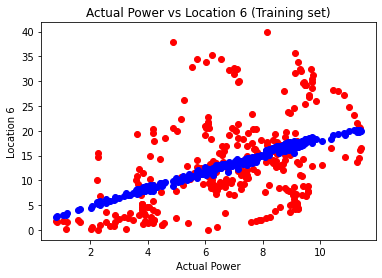

In [189]:
# Visualising the Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], omr.predict(X_train[:, opt_columns]), 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

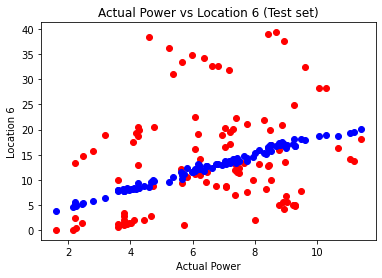

In [190]:
# Visualising the Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], omr.predict(X_test[:, opt_columns]), 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

    Створимо датафрейм з метриками якості розглянутих моделей і за допомогою цього оцінимо та порівняємо якість створених моделей.

In [191]:
# Creating dataframe with metrics
model=['sr', 'mr', 'pr', 'omr']
metrics_df=pd.DataFrame()
metrics_df['model']=model
metrics_df['train_r2']=training_score
metrics_df['test_r2']=test_score
metrics_df['train_mse']=training_mse
metrics_df['test_mse']=test_mse
metrics_df

,model,train_r2,test_r2,train_mse,test_mse
0,sr,0.209457,0.058663,61.675741,99.633196
1,mr,0.256283,0.165448,58.022451,88.330845
2,pr,0.218420,0.083147,60.976428,97.041684
3,omr,0.210086,0.050350,61.626635,100.513033


    Можна побачити, що всі моделі мають низькі коефіцієнти детермінації та високу середньоквадратичну помилку MSE, що свідчить про їхню низьку якість, неможливість застосовувати їх для отримання якісних оцінок вихідної змінної ActualPower. Це можна пояснити їхньою низькою кореляцією з результуючою змінною, а також високою кореляцію між ними для більшості незалжених змінних, що може, наприклад, показувати наявність в багатофакторних лінійних моделях такої помилки, як мультиколінеарності.
    Разом з тим, найкращоб з розглянутих лінійних моделей є багатофакторна лінійна регресія всіх незалежних змінних mr: вона має найкращі значення метрик і для навчальної, і для тестової вибірки, проте вони все не є хорошими.

    Далі розглянемо моделі дерева рішень та випадкового лісу, а саме наступні моделі у такому порядку:
    модель дерева рішень за однією незалежною змінною Location 6;
    модель дерева рішень за всіма факторними змінними;
    модель випадкового лісу за всіма факторними змінними;
    модель дерева рішень за оптимальними факторними змінними, відібраними за методом зворотного виключення Backward Elimination;
    модель випадкового лісу за оптимальними факторними змінними, відібраними за методом зворотного виключення Backward Elimination.
    Для всіх цих моделей проведемо прогноз за ними, розрахуємо метрики якості моделі та графічно відобразимо результати моделі порівняно з реальними значеннями.

In [192]:
# Fitting Tree to the Training set (Location 6)
from sklearn.tree import DecisionTreeRegressor
sdt=DecisionTreeRegressor(max_leaf_nodes=10).fit(X_train[:, 3:4], y_train)

In [193]:
# Predicting the Test set results
y_pred=sdt.predict(X_test[:, 3:4])

In [194]:
# Coefficient of determination R^2
sdt_metrics=['sdt']
sdt_metrics.append(sdt.score(X_train[:, 3:4], y_train))
sdt_metrics.append(sdt.score(X_test[:, 3:4], y_test))
sdt.score(X_train[:, 3:4], y_train), sdt.score(X_test[:, 3:4], y_test)

(0.38522565685787546, 0.04092629983538576)

In [195]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
sdt_metrics.append(mean_squared_error(y_train, sdt.predict(X_train[:, 3:4])))
sdt_metrics.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, sdt.predict(X_train[:, 3:4])), mean_squared_error(y_test, y_pred)

(47.96278314439418, 101.5104401493606)

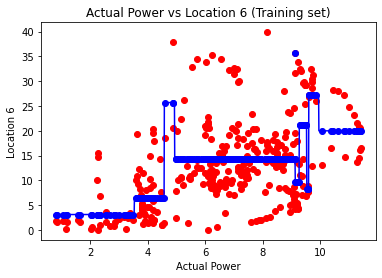

In [196]:
# Visualising the Training set results
X_grid=np.arange(min(X[:, 3:4]), max(X[:, 3:4]), 0.01)
X_grid=X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color='blue')
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], sdt.predict(X_train[:, 3:4]), 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

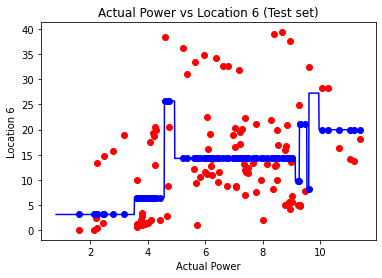

In [197]:
# Visualising the Test set results
X_grid=np.arange(min(X[:, 3:4]), max(X[:, 3:4]), 0.01)
X_grid=X_grid.reshape((len(X_grid), 1))
plt.plot(X_grid, sdt.predict(X_grid), color='blue')
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], sdt.predict(X_test[:, 3:4]), 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

In [198]:
# Fitting Tree to the Training set 
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(max_leaf_nodes=10).fit(X_train, y_train)

In [199]:
# Predicting the Test set results
y_pred=dt.predict(X_test)

In [200]:
# Coefficient of determination R^2
dt_metrics=['dt']
dt_metrics.append(dt.score(X_train, y_train))
dt_metrics.append(dt.score(X_test, y_test))
dt.score(X_train, y_train), dt.score(X_test, y_test)

(0.6479462360512848, 0.6229355239842269)

In [201]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
dt_metrics.append(mean_squared_error(y_train, dt.predict(X_train)))
dt_metrics.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, dt.predict(X_train)), mean_squared_error(y_test, y_pred)

(27.466140257477132, 39.9093217950607)

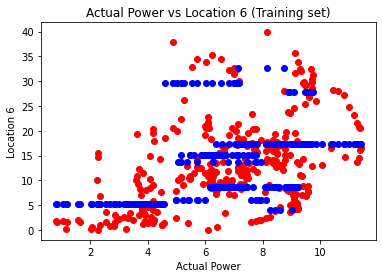

In [202]:
# Visualising the Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], dt.predict(X_train), 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

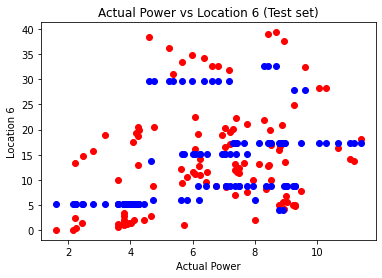

In [203]:
# Visualising the Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], dt.predict(X_test), 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

In [204]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=10, random_state=123).fit(X_train, y_train)

<ipython-input-204-7b656791511d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf=RandomForestRegressor(n_estimators=10, random_state=123).fit(X_train, y_train)


In [205]:
# Predicting the Test set results
y_pred=rf.predict(X_test)

In [206]:
# Coefficient of determination R^2
rf_metrics=['rf']
rf_metrics.append(rf.score(X_train, y_train))
rf_metrics.append(rf.score(X_test, y_test))
rf.score(X_train, y_train), rf.score(X_test, y_test)

(0.9281760128424559, 0.5743217601892004)

In [207]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
rf_metrics.append(mean_squared_error(y_train, rf.predict(X_train)))
rf_metrics.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, rf.predict(X_train)), mean_squared_error(y_test, y_pred)

(5.603484203644858, 45.0547079726852)

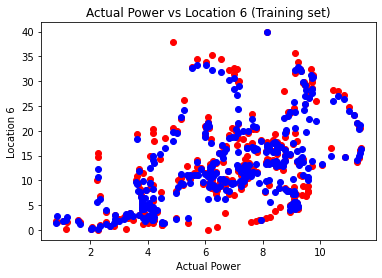

In [208]:
# Visualising the Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], rf.predict(X_train), 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

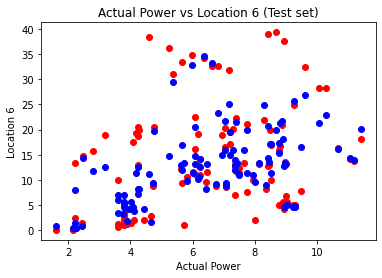

In [209]:
# Visualising the Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], rf.predict(X_test), 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

In [210]:
# Fitting Tree to the Optimized Training set 
from sklearn.tree import DecisionTreeRegressor
odt=DecisionTreeRegressor(max_leaf_nodes=10).fit(X_train[:, opt_columns], y_train)

In [211]:
# Predicting the Test set results
y_pred=odt.predict(X_test[:, opt_columns])

In [212]:
# Coefficient of determination R^2
odt_metrics=['odt']
odt_metrics.append(odt.score(X_train[:, opt_columns], y_train))
odt_metrics.append(odt.score(X_test[:, opt_columns], y_test))
odt.score(X_train[:, opt_columns], y_train), odt.score(X_test[:, opt_columns], y_test)

(0.4799337231416434, 0.03773291539663992)

In [213]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
odt_metrics.append(mean_squared_error(y_train, odt.predict(X_train[:, opt_columns])))
odt_metrics.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, odt.predict(X_train[:, opt_columns])), mean_squared_error(y_test, y_pred)

(40.57395422551534, 101.84843488312045)

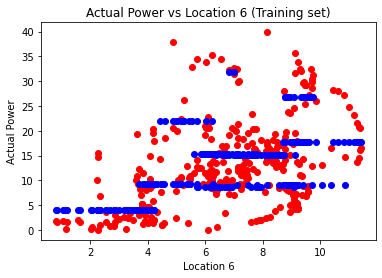

In [214]:
# Visualising the Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], odt.predict(X_train[:, opt_columns]), 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Location 6')
plt.ylabel('Actual Power')
plt.show()

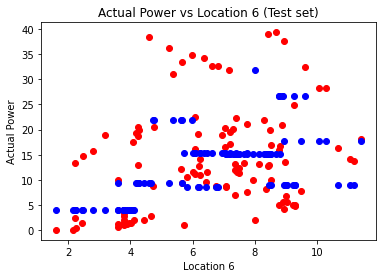

In [215]:
# Visualising the Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], odt.predict(X_test[:, opt_columns]), 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Location 6')
plt.ylabel('Actual Power')
plt.show()

In [216]:
# Fitting Random Forest to the Optimized Training set
from sklearn.ensemble import RandomForestRegressor
orf=RandomForestRegressor(n_estimators=10, random_state=123).fit(X_train[:, opt_columns], y_train)

<ipython-input-216-508034c0c126>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  orf=RandomForestRegressor(n_estimators=10, random_state=123).fit(X_train[:, opt_columns], y_train)


In [217]:
# Predicting the Test set results
y_pred=orf.predict(X_test[:, opt_columns])

In [218]:
# Coefficient of determination R^2
orf_metrics=['orf']
orf_metrics.append(orf.score(X_train[:, opt_columns], y_train))
orf_metrics.append(orf.score(X_test[:, opt_columns], y_test))
orf.score(X_train[:, opt_columns], y_train), orf.score(X_test[:, opt_columns], y_test)

(0.8881419948337357, 0.05656027178677525)

In [219]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
orf_metrics.append(mean_squared_error(y_train, orf.predict(X_train[:, opt_columns])))
orf_metrics.append(mean_squared_error(y_test, y_pred))
mean_squared_error(y_train, orf.predict(X_train[:, opt_columns])), mean_squared_error(y_test, y_pred)

(8.726813837632397, 99.85570665620371)

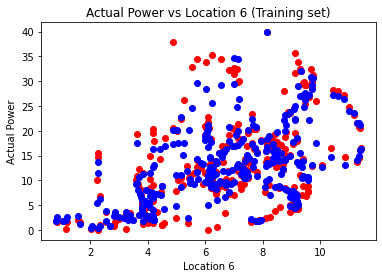

In [220]:
# Visualising the Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], orf.predict(X_train[:, opt_columns]), 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Location 6')
plt.ylabel('Actual Power')
plt.show()

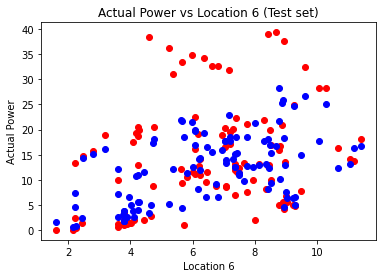

In [221]:
# Visualising the Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], orf.predict(X_test[:, opt_columns]), 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Location 6')
plt.ylabel('Actual Power')
plt.show()

    Доповнимо датафрейм з метриками якості розглянутих моделей і за допомогою цього оцінимо та порівняємо якість створених моделей.

In [222]:
for to_append in [sdt_metrics, dt_metrics, rf_metrics, odt_metrics, orf_metrics]:
    a_series=pd.Series(to_append, index=metrics_df.columns)
    metrics_df=metrics_df.append(a_series, ignore_index=True)
metrics_df.iloc[4:]

,model,train_r2,test_r2,train_mse,test_mse
4,sdt,0.385226,0.040926,47.962783,101.510440
5,dt,0.647946,0.622936,27.466140,39.909322
6,rf,0.928176,0.574322,5.603484,45.054708
7,odt,0.479934,0.037733,40.573954,101.848435
8,orf,0.888142,0.056560,8.726814,99.855707


    Можна побачити, що деякі новостворені моделі мають доволі хороший коефіцієнт детермінації для тестової вибірки, але відносно нижчий для тестової вибірки, що може свідчити про перенавчання моделі: так, для моделі випадкового лісу за всіма факторними змінними rf маємо великий коефіцієнт кореляції для навчальної вибірки 0,928 і менший для тестової 0,623. Ще гірша ситація для моделі випадкового лісу orf, побудованої на значущих змінних: 0,888 і 0,566 для навчальної та тествої вибірки відповідно.
    Разом з тим є модель дерева рішень за всіма змінними dt, яка має коефіцієнт детермінації для тестової вибірки 0,648 і незначно нижчий для тествої - 0,623. Саме її варто розглядати як найкращу серед моделей дерева рішень і випадкового лісу, яка не має слідів перенавчання і має найкращі прогнозні якості.
    Результати по середньоквадратичній помилці MSE повторюю результати за коефіцієнтом детермінації. Тепер порівняємо ці моделі з лінійними.

In [223]:
metrics_df

,model,train_r2,test_r2,train_mse,test_mse
0,sr,0.209457,0.058663,61.675741,99.633196
1,mr,0.256283,0.165448,58.022451,88.330845
2,pr,0.218420,0.083147,60.976428,97.041684
3,omr,0.210086,0.050350,61.626635,100.513033
4,sdt,0.385226,0.040926,47.962783,101.510440
5,dt,0.647946,0.622936,27.466140,39.909322
6,rf,0.928176,0.574322,5.603484,45.054708
7,odt,0.479934,0.037733,40.573954,101.848435
8,orf,0.888142,0.056560,8.726814,99.855707


    Можна побачити, що модель dt, а також модель rf, незважаючи на її перенавчання, є кращими за лінійні моделі. Інші моделі в цілому мають схожі низькі метрики якості.

    Далі розглянемо моделювання за допомогою нейронних мереж. Будуть розглянуті мережі з такою архітектурою:
    5-5-1;
    5-5-5-1;
    5-10-1;
    5-10-10-1;
    входами яких є факторні змінні, а виходом - результуюча.
    Також було розглянуто нейронні мережі з наступними архітектурами:
    2-2-1;
    2-2-2-1;
    2-4-1;
    2-4-4-1;
    входами яких є факторні змінні, відібрані за методом зворотного виключення Backward Elimination з рівнем значущості 0,05; а виходом - результуюча змінна.
    Для цих моделей буде проведене попереднє шкалювання даних, проведено навчання на протязі 200 епох партіями по 10, а також розраховано оцінку та прогноз результуючою змінною, графічно відображено результати моделювання порівнянно з реальними значеннями (за шкальованими даними), буде проведене зворотне шкалювання для розрахунку такої метрику якості як середньоквадратичної помилки MSE для навчальної і тестової вибірки, аби мати змогу порівняти нейронні мережі  попередніми моделями.

    Для стандартизування множин X_train і X_test було створено об'єкт scalerX з параметрами шкалювання, взятої з X_train, а також аналогічно було створено метод scalerY з параметрами шкалювання від множини y_train для стандартизації цієї ж множини, а також y_test. Оскільки всі змінні є числовими, то їх не потрібно стандартизувати по одній.
    Після шкалювання перейдом власне до створення нейронних мереж і моделювання з їхньою допомогою.

In [224]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scalerX=StandardScaler().fit(X_train)
scalerY=StandardScaler().fit(y_train)
X_train=scalerX.transform(X_train)
y_train=scalerY.transform(y_train)
X_test=scalerX.transform(X_test)
y_test=scalerY.transform(y_test)

In [225]:
# Install Tensorflow
# Install Keras
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Input

In [226]:
# Creating model
np.random.seed(123)

# Initialising the ANN
rnn1=Sequential()

# Adding the input layer
rnn1.add(Input(shape=(5,)))

# Adding the hidden layer
rnn1.add(Dense(5, activation='tanh'))

# Adding the output layer
rnn1.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn1.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [227]:
# Fitting the ANN to the Training set
rnn1.fit(X_train, y_train, batch_size=10, epochs=200)

Epoch 1/200
33/33 [==============================] - 0s 4ms/step - loss: 1.8797 - accuracy: 0.0000e+00
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 1.5571 - accuracy: 0.0000e+00
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 1.3554 - accuracy: 0.0000e+00
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 1.2181 - accuracy: 0.0000e+00
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 1.1232 - accuracy: 0.0000e+00
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 1.0463 - accuracy: 0.0000e+00
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 0.9897 - accuracy: 0.0000e+00
Epoch 8/200
33/33 [==============================] - 0s 3ms/step - loss: 0.9433 - accuracy: 0.0000e+00
Epoch 9/200
33/33 [==============================] - 0s 3ms/step - loss: 0.9092 - accuracy: 0.0000e+00
Epoch 10/200
33/33 [==============================] - 0s 3ms/step - loss:

33/33 [==============================] - 0s 4ms/step - loss: 0.6208 - accuracy: 0.0000e+00
Epoch 78/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6213 - accuracy: 0.0000e+00
Epoch 79/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6205 - accuracy: 0.0000e+00
Epoch 80/200
33/33 [==============================] - 0s 5ms/step - loss: 0.6184 - accuracy: 0.0000e+00
Epoch 81/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6180 - accuracy: 0.0000e+00
Epoch 82/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6163 - accuracy: 0.0000e+00
Epoch 83/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6160 - accuracy: 0.0000e+00
Epoch 84/200
33/33 [==============================] - 0s 5ms/step - loss: 0.6157 - accuracy: 0.0000e+00
Epoch 85/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6143 - accuracy: 0.0000e+00
Epoch 86/200
33/33 [==============================] - 0s 4ms/step - loss: 0.6

33/33 [==============================] - 0s 3ms/step - loss: 0.5613 - accuracy: 0.0000e+00
Epoch 155/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5615 - accuracy: 0.0000e+00: 0s - loss: 0.5533 - accuracy: 0.0000e+
Epoch 156/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5607 - accuracy: 0.0000e+00
Epoch 157/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.0000e+00
Epoch 158/200
33/33 [==============================] - 0s 4ms/step - loss: 0.5605 - accuracy: 0.0000e+00
Epoch 159/200
33/33 [==============================] - 0s 4ms/step - loss: 0.5583 - accuracy: 0.0000e+00
Epoch 160/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5569 - accuracy: 0.0000e+00
Epoch 161/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5553 - accuracy: 0.0000e+00
Epoch 162/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5556 - accuracy: 0.0000e+00
Epoch 163/200
33/33 [========

In [228]:
# Predict the Training set results
y_modeled1=rnn1.predict(X_train)

In [229]:
# Predicting the Test set results
y_pred1=rnn1.predict(X_test)

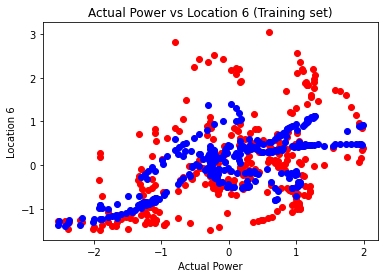

In [230]:
# Visualising the Scaled Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], y_modeled1, 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

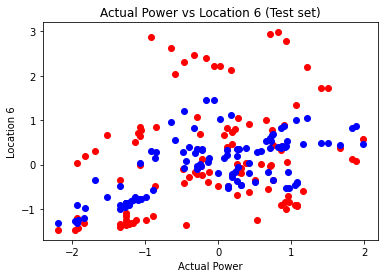

In [231]:
# Visualising the Scaled Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], y_pred1, 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

In [232]:
# Creating model
np.random.seed(123)

# Initialising the ANN
rnn2=Sequential()

# Adding the input layer
rnn2.add(Input(shape=(5,)))

# Adding the first hidden layer
rnn2.add(Dense(5, activation='tanh'))

# Adding the second hidden layer
rnn2.add(Dense(5, activation='tanh'))

# Adding the output layer
rnn2.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn2.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [233]:
# Fitting the ANN to the Training set
rnn2.fit(X_train, y_train, batch_size=10, epochs=200)

Epoch 1/200
33/33 [==============================] - 0s 6ms/step - loss: 1.2341 - accuracy: 0.0000e+00
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 1.0209 - accuracy: 0.0000e+00
Epoch 3/200
33/33 [==============================] - 0s 5ms/step - loss: 0.8975 - accuracy: 0.0000e+00
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8364 - accuracy: 0.0000e+00
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8013 - accuracy: 0.0000e+00
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7767 - accuracy: 0.0000e+00
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7583 - accuracy: 0.0000e+00
Epoch 8/200
33/33 [==============================] - 0s 6ms/step - loss: 0.7455 - accuracy: 0.0000e+00
Epoch 9/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7355 - accuracy: 0.0000e+00
Epoch 10/200
33/33 [==============================] - 0s 4ms/step - loss:

33/33 [==============================] - 0s 6ms/step - loss: 0.5252 - accuracy: 0.0000e+00: 0s - loss: 0.5117 - accuracy: 0.0000e+
Epoch 79/200
33/33 [==============================] - 0s 4ms/step - loss: 0.5244 - accuracy: 0.0000e+00
Epoch 80/200
33/33 [==============================] - 0s 7ms/step - loss: 0.5232 - accuracy: 0.0000e+00
Epoch 81/200
33/33 [==============================] - 0s 4ms/step - loss: 0.5200 - accuracy: 0.0000e+00: 0s - loss: 0.5210 - accuracy: 0.0000e+
Epoch 82/200
33/33 [==============================] - 0s 4ms/step - loss: 0.5176 - accuracy: 0.0000e+00
Epoch 83/200
33/33 [==============================] - 0s 4ms/step - loss: 0.5166 - accuracy: 0.0000e+00
Epoch 84/200
33/33 [==============================] - 0s 4ms/step - loss: 0.5168 - accuracy: 0.0000e+00
Epoch 85/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.0000e+00
Epoch 86/200
33/33 [==============================] - 0s 4ms/step - loss: 0.5134 - accuracy: 0.0000e+

33/33 [==============================] - 0s 3ms/step - loss: 0.4068 - accuracy: 0.0000e+00
Epoch 155/200
33/33 [==============================] - 0s 5ms/step - loss: 0.4046 - accuracy: 0.0000e+00: 0s - loss: 0.4046 - accuracy: 0.0000e+
Epoch 156/200
33/33 [==============================] - 0s 6ms/step - loss: 0.4034 - accuracy: 0.0000e+00
Epoch 157/200
33/33 [==============================] - 0s 9ms/step - loss: 0.4063 - accuracy: 0.0000e+00: 0s - loss: 0.4196 - accuracy: 0.00 - ETA: 0s - loss: 0.4063 - accuracy: 0.0000e+
Epoch 158/200
33/33 [==============================] - 0s 8ms/step - loss: 0.4021 - accuracy: 0.0000e+00
Epoch 159/200
33/33 [==============================] - 0s 8ms/step - loss: 0.4018 - accuracy: 0.0000e+00
Epoch 160/200
33/33 [==============================] - 0s 6ms/step - loss: 0.3976 - accuracy: 0.0000e+00
Epoch 161/200
33/33 [==============================] - 0s 7ms/step - loss: 0.3978 - accuracy: 0.0000e+00
Epoch 162/200
33/33 [==============================]

In [234]:
# Predict the Training set results
y_modeled2=rnn2.predict(X_train)

In [235]:
# Predicting the Test set results
y_pred2=rnn2.predict(X_test)

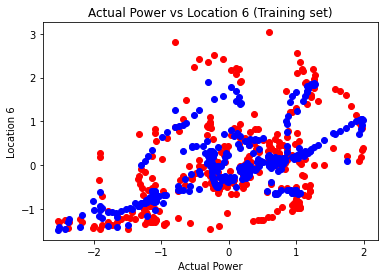

In [236]:
# Visualising the Scaled Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], y_modeled2, 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

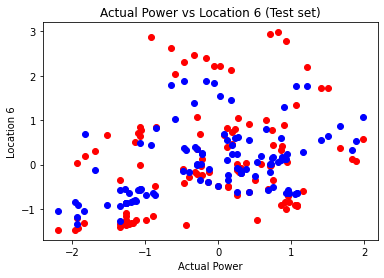

In [237]:
# Visualising the Scaled Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], y_pred2, 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

In [238]:
# Creating model
np.random.seed(123)

# Initialising the ANN
rnn3=Sequential()

# Adding the input layer
rnn3.add(Input(shape=(5,)))

# Adding the hidden layer
rnn3.add(Dense(10, activation='tanh'))

# Adding the output layer
rnn3.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn3.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [239]:
# Fitting the ANN to the Training set
rnn3.fit(X_train, y_train, batch_size=10, epochs=200)

Epoch 1/200
33/33 [==============================] - 0s 4ms/step - loss: 0.9687 - accuracy: 0.0000e+00
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 0.9038 - accuracy: 0.0000e+00
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8658 - accuracy: 0.0000e+00
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8363 - accuracy: 0.0000e+00
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8126 - accuracy: 0.0000e+00
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7938 - accuracy: 0.0000e+00
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7713 - accuracy: 0.0000e+00
Epoch 8/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7555 - accuracy: 0.0000e+00
Epoch 9/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7408 - accuracy: 0.0000e+00
Epoch 10/200
33/33 [==============================] - 0s 4ms/step - loss:

33/33 [==============================] - 0s 3ms/step - loss: 0.5305 - accuracy: 0.0000e+00
Epoch 79/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5296 - accuracy: 0.0000e+00
Epoch 80/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5264 - accuracy: 0.0000e+00
Epoch 81/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5262 - accuracy: 0.0000e+00
Epoch 82/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5247 - accuracy: 0.0000e+00
Epoch 83/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5240 - accuracy: 0.0000e+00
Epoch 84/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5207 - accuracy: 0.0000e+00
Epoch 85/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5191 - accuracy: 0.0000e+00
Epoch 86/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5179 - accuracy: 0.0000e+00
Epoch 87/200
33/33 [==============================] - 0s 3ms/step - loss: 0.5

33/33 [==============================] - 0s 3ms/step - loss: 0.4315 - accuracy: 0.0000e+00
Epoch 157/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4298 - accuracy: 0.0000e+00
Epoch 158/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4301 - accuracy: 0.0000e+00
Epoch 159/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4308 - accuracy: 0.0000e+00
Epoch 160/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4277 - accuracy: 0.0000e+00
Epoch 161/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4267 - accuracy: 0.0000e+00
Epoch 162/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4292 - accuracy: 0.0000e+00
Epoch 163/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4345 - accuracy: 0.0000e+00
Epoch 164/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4259 - accuracy: 0.0000e+00
Epoch 165/200
33/33 [==============================] - 0s 3ms/step - 

In [240]:
# Predict the Training set results
y_modeled3=rnn3.predict(X_train)

In [241]:
# Predicting the Test set results
y_pred3=rnn3.predict(X_test)

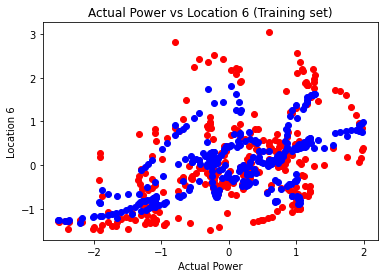

In [242]:
# Visualising the Scaled Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], y_modeled3, 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

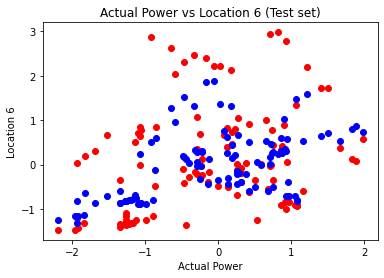

In [243]:
# Visualising the Scaled Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], y_pred3, 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

In [244]:
# Creating model
np.random.seed(123)

# Initialising the ANN
rnn4=Sequential()

# Adding the input layer
rnn4.add(Input(shape=(5,)))

# Adding the first hidden layer
rnn4.add(Dense(10, activation='tanh'))

# Adding the second hidden layer
rnn4.add(Dense(10, activation='tanh'))

# Adding the output layer
rnn4.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn4.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [245]:
# Fitting the ANN to the Training set
rnn4.fit(X_train, y_train, batch_size=10, epochs=200)

Epoch 1/200
33/33 [==============================] - 0s 3ms/step - loss: 2.2135 - accuracy: 0.0000e+00
Epoch 2/200
33/33 [==============================] - 0s 3ms/step - loss: 1.3441 - accuracy: 0.0000e+00
Epoch 3/200
33/33 [==============================] - 0s 3ms/step - loss: 0.9928 - accuracy: 0.0000e+00
Epoch 4/200
33/33 [==============================] - 0s 3ms/step - loss: 0.8700 - accuracy: 0.0000e+00
Epoch 5/200
33/33 [==============================] - 0s 3ms/step - loss: 0.8294 - accuracy: 0.0000e+00
Epoch 6/200
33/33 [==============================] - 0s 3ms/step - loss: 0.8051 - accuracy: 0.0000e+00
Epoch 7/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7830 - accuracy: 0.0000e+00
Epoch 8/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7656 - accuracy: 0.0000e+00
Epoch 9/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7496 - accuracy: 0.0000e+00
Epoch 10/200
33/33 [==============================] - 0s 3ms/step - loss:

33/33 [==============================] - 0s 3ms/step - loss: 0.4478 - accuracy: 0.0000e+00
Epoch 80/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4430 - accuracy: 0.0000e+00
Epoch 81/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4435 - accuracy: 0.0000e+00
Epoch 82/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4430 - accuracy: 0.0000e+00
Epoch 83/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4387 - accuracy: 0.0000e+00
Epoch 84/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4381 - accuracy: 0.0000e+00
Epoch 85/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4393 - accuracy: 0.0000e+00
Epoch 86/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4370 - accuracy: 0.0000e+00
Epoch 87/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4357 - accuracy: 0.0000e+00
Epoch 88/200
33/33 [==============================] - 0s 3ms/step - loss: 0.4

33/33 [==============================] - 0s 11ms/step - loss: 0.3447 - accuracy: 0.0000e+00
Epoch 156/200
33/33 [==============================] - 1s 15ms/step - loss: 0.3467 - accuracy: 0.0000e+00
Epoch 157/200
33/33 [==============================] - 0s 13ms/step - loss: 0.3468 - accuracy: 0.0000e+00
Epoch 158/200
33/33 [==============================] - 0s 13ms/step - loss: 0.3478 - accuracy: 0.0000e+00 0s - loss: 0.2946 - accuracy
Epoch 159/200
33/33 [==============================] - 1s 16ms/step - loss: 0.3456 - accuracy: 0.0000e+00
Epoch 160/200
33/33 [==============================] - 0s 9ms/step - loss: 0.3434 - accuracy: 0.0000e+00
Epoch 161/200
33/33 [==============================] - 0s 13ms/step - loss: 0.3390 - accuracy: 0.0000e+00
Epoch 162/200
33/33 [==============================] - 0s 5ms/step - loss: 0.3599 - accuracy: 0.0000e+00
Epoch 163/200
33/33 [==============================] - 0s 11ms/step - loss: 0.3431 - accuracy: 0.0000e+00
Epoch 164/200
33/33 [============

In [246]:
# Predict the Training set results
y_modeled4=rnn4.predict(X_train)

In [247]:
# Predicting the Test set results
y_pred4=rnn4.predict(X_test)

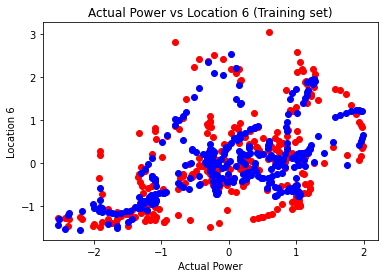

In [248]:
# Visualising the Scaled Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], y_modeled4, 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

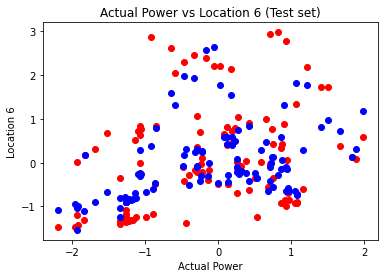

In [249]:
# Visualising the Scaled Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], y_pred4, 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

In [250]:
# Creating model
np.random.seed(123)

# Initialising the ANN
rnn5=Sequential()

# Adding the input layer
rnn5.add(Input(shape=(2,)))

# Adding the hidden layer
rnn5.add(Dense(2, activation='tanh'))

# Adding the output layer
rnn5.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn5.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [251]:
# Fitting the ANN to the Training set
rnn5.fit(X_train[:, opt_columns], y_train, batch_size=10, epochs=200)

Epoch 1/200
33/33 [==============================] - 0s 3ms/step - loss: 0.8372 - accuracy: 0.0000e+00
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8250 - accuracy: 0.0000e+00
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8131 - accuracy: 0.0000e+00
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8085 - accuracy: 0.0000e+00
Epoch 5/200
33/33 [==============================] - 0s 11ms/step - loss: 0.8020 - accuracy: 0.0000e+00
Epoch 6/200
33/33 [==============================] - 0s 6ms/step - loss: 0.7972 - accuracy: 0.0000e+00
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7952 - accuracy: 0.0000e+00
Epoch 8/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7921 - accuracy: 0.0000e+00
Epoch 9/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7888 - accuracy: 0.0000e+00
Epoch 10/200
33/33 [==============================] - 0s 4ms/step - loss

33/33 [==============================] - 1s 16ms/step - loss: 0.7445 - accuracy: 0.0000e+00
Epoch 78/200
33/33 [==============================] - 0s 12ms/step - loss: 0.7444 - accuracy: 0.0000e+00
Epoch 79/200
33/33 [==============================] - 0s 12ms/step - loss: 0.7442 - accuracy: 0.0000e+00
Epoch 80/200
33/33 [==============================] - 0s 13ms/step - loss: 0.7448 - accuracy: 0.0000e+00 1s - loss: 0.6667 - accuracy
Epoch 81/200
33/33 [==============================] - 0s 11ms/step - loss: 0.7443 - accuracy: 0.0000e+00
Epoch 82/200
33/33 [==============================] - 0s 10ms/step - loss: 0.7439 - accuracy: 0.0000e+00
Epoch 83/200
33/33 [==============================] - 0s 10ms/step - loss: 0.7432 - accuracy: 0.0000e+00
Epoch 84/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7430 - accuracy: 0.0000e+00
Epoch 85/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7429 - accuracy: 0.0000e+00
Epoch 86/200
33/33 [=====================

33/33 [==============================] - 0s 6ms/step - loss: 0.7292 - accuracy: 0.0000e+00
Epoch 151/200
33/33 [==============================] - 0s 13ms/step - loss: 0.7288 - accuracy: 0.0000e+00 0s - loss: 0.8575 - accuracy: 
Epoch 152/200
33/33 [==============================] - 0s 9ms/step - loss: 0.7283 - accuracy: 0.0000e+00
Epoch 153/200
33/33 [==============================] - 0s 8ms/step - loss: 0.7284 - accuracy: 0.0000e+00
Epoch 154/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7277 - accuracy: 0.0000e+00
Epoch 155/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7278 - accuracy: 0.0000e+00
Epoch 156/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7278 - accuracy: 0.0000e+00
Epoch 157/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7287 - accuracy: 0.0000e+00
Epoch 158/200
33/33 [==============================] - 0s 7ms/step - loss: 0.7282 - accuracy: 0.0000e+00
Epoch 159/200
33/33 [================

In [252]:
# Predict the Training set results
y_modeled5=rnn5.predict(X_train[:, opt_columns])

In [253]:
# Predict the Test set results
y_pred5=rnn5.predict(X_test[:, opt_columns])

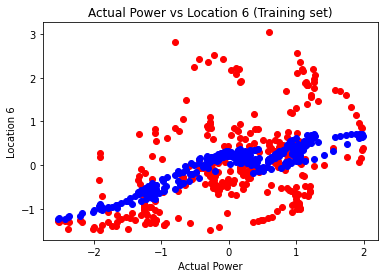

In [254]:
# Visualising the Scaled Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], y_modeled5, 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

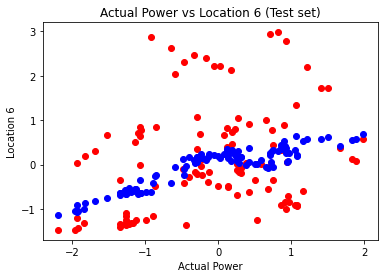

In [255]:
# Visualising the Scaled Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], y_pred5, 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

In [256]:
# Creating model
np.random.seed(123)

# Initialising the ANN
rnn6=Sequential()

# Adding the input layer
rnn6.add(Input(shape=(2,)))

# Adding the first hidden layer
rnn6.add(Dense(2, activation='tanh'))

# Adding the second hidden layer
rnn6.add(Dense(2, activation='tanh'))

# Adding the output layer
rnn6.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn6.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [257]:
# Fitting the ANN to the Training set
rnn6.fit(X_train[:, opt_columns], y_train, batch_size=10, epochs=200)

Epoch 1/200
33/33 [==============================] - 0s 6ms/step - loss: 0.9860 - accuracy: 0.0000e+00
Epoch 2/200
33/33 [==============================] - 0s 5ms/step - loss: 0.9733 - accuracy: 0.0000e+00
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 0.9580 - accuracy: 0.0000e+00
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 0.9439 - accuracy: 0.0000e+00
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 0.9283 - accuracy: 0.0000e+00
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 0.9137 - accuracy: 0.0000e+00
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8990 - accuracy: 0.0000e+00
Epoch 8/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8860 - accuracy: 0.0000e+00
Epoch 9/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8729 - accuracy: 0.0000e+00
Epoch 10/200
33/33 [==============================] - 0s 4ms/step - loss:

33/33 [==============================] - 0s 4ms/step - loss: 0.7742 - accuracy: 0.0000e+00
Epoch 80/200
33/33 [==============================] - ETA: 0s - loss: 0.7735 - accuracy: 0.0000e+ - 0s 5ms/step - loss: 0.7735 - accuracy: 0.0000e+00
Epoch 81/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7729 - accuracy: 0.0000e+00
Epoch 82/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7722 - accuracy: 0.0000e+00
Epoch 83/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7712 - accuracy: 0.0000e+00
Epoch 84/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7710 - accuracy: 0.0000e+00
Epoch 85/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7699 - accuracy: 0.0000e+00
Epoch 86/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7694 - accuracy: 0.0000e+00
Epoch 87/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7685 - accuracy: 0.0000e+00
Epoch 88/200
33/33 [===========

33/33 [==============================] - 0s 3ms/step - loss: 0.7370 - accuracy: 0.0000e+00
Epoch 156/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7381 - accuracy: 0.0000e+00
Epoch 157/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7361 - accuracy: 0.0000e+00
Epoch 158/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7356 - accuracy: 0.0000e+00
Epoch 159/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7353 - accuracy: 0.0000e+00
Epoch 160/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7353 - accuracy: 0.0000e+00
Epoch 161/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7347 - accuracy: 0.0000e+00: 0s - loss: 0.7463 - accuracy: 0.0000e+
Epoch 162/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7342 - accuracy: 0.0000e+00
Epoch 163/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7340 - accuracy: 0.0000e+00
Epoch 164/200
33/33 [========

In [258]:
# Predict the Training set results
y_modeled6=rnn6.predict(X_train[:, opt_columns])

In [259]:
# Predict the Test set results
y_pred6=rnn6.predict(X_test[:, opt_columns])

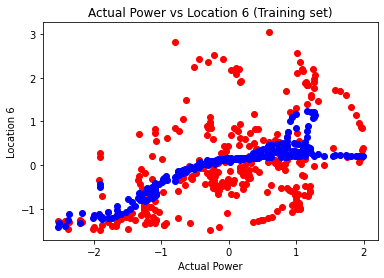

In [260]:
# Visualising the Scaled Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], y_modeled6, 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

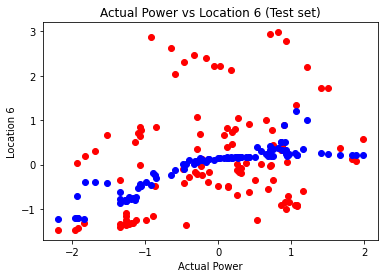

In [261]:
# Visualising the Scaled Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], y_pred6, 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

In [262]:
# Creating model
np.random.seed(123)

# Initialising the ANN
rnn7=Sequential()

# Adding the input layer
rnn7.add(Input(shape=(2,)))

# Adding the hidden layer
rnn7.add(Dense(4, activation='tanh'))

# Adding the output layer
rnn7.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn7.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [263]:
# Fitting the ANN to the Training set
rnn7.fit(X_train[:, opt_columns], y_train, batch_size=10, epochs=200)

Epoch 1/200
33/33 [==============================] - 0s 4ms/step - loss: 0.9309 - accuracy: 0.0000e+00
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8946 - accuracy: 0.0000e+00
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8745 - accuracy: 0.0000e+00
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8607 - accuracy: 0.0000e+00
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8465 - accuracy: 0.0000e+00
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8381 - accuracy: 0.0000e+00
Epoch 7/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8312 - accuracy: 0.0000e+00
Epoch 8/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8235 - accuracy: 0.0000e+00
Epoch 9/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8199 - accuracy: 0.0000e+00
Epoch 10/200
33/33 [==============================] - 0s 4ms/step - loss:

33/33 [==============================] - 0s 3ms/step - loss: 0.7779 - accuracy: 0.0000e+00
Epoch 79/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7777 - accuracy: 0.0000e+00
Epoch 80/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7777 - accuracy: 0.0000e+00
Epoch 81/200
33/33 [==============================] - 0s 5ms/step - loss: 0.7776 - accuracy: 0.0000e+00
Epoch 82/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7771 - accuracy: 0.0000e+00
Epoch 83/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7790 - accuracy: 0.0000e+00
Epoch 84/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7779 - accuracy: 0.0000e+00
Epoch 85/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7756 - accuracy: 0.0000e+00
Epoch 86/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7758 - accuracy: 0.0000e+00
Epoch 87/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7

33/33 [==============================] - 0s 4ms/step - loss: 0.7652 - accuracy: 0.0000e+00
Epoch 156/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7655 - accuracy: 0.0000e+00
Epoch 157/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7660 - accuracy: 0.0000e+00
Epoch 158/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7657 - accuracy: 0.0000e+00
Epoch 159/200
33/33 [==============================] - 0s 4ms/step - loss: 0.7655 - accuracy: 0.0000e+00
Epoch 160/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7661 - accuracy: 0.0000e+00
Epoch 161/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7646 - accuracy: 0.0000e+00
Epoch 162/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7673 - accuracy: 0.0000e+00
Epoch 163/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7647 - accuracy: 0.0000e+00
Epoch 164/200
33/33 [==============================] - 0s 3ms/step - 

In [264]:
# Predict the Training set results
y_modeled7=rnn7.predict(X_train[:, opt_columns])

In [265]:
# Predict the Test set results
y_pred7=rnn7.predict(X_test[:, opt_columns])

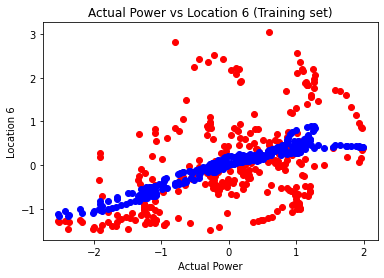

In [266]:
# Visualising the Scaled Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], y_modeled7, 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

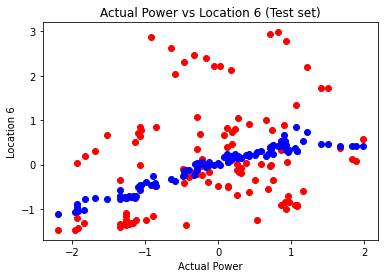

In [267]:
# Visualising the Scaled Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], y_pred7, 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

In [268]:
# Creating model
np.random.seed(123)

# Initialising the ANN
rnn8=Sequential()

# Adding the input layer
rnn8.add(Input(shape=(2,)))

# Adding the first hidden layer
rnn8.add(Dense(4, activation='tanh'))

rnn8.add(Dense(4, activation='tanh'))

# Adding the output layer
rnn8.add(Dense(1, activation='linear'))

# Compiling the ANN
rnn8.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [269]:
# Fitting the ANN to the Training set
rnn8.fit(X_train[:, opt_columns], y_train, batch_size=10, epochs=200)

Epoch 1/200
33/33 [==============================] - 0s 4ms/step - loss: 1.5996 - accuracy: 0.0000e+00
Epoch 2/200
33/33 [==============================] - 0s 4ms/step - loss: 1.4299 - accuracy: 0.0000e+00
Epoch 3/200
33/33 [==============================] - 0s 4ms/step - loss: 1.3000 - accuracy: 0.0000e+00
Epoch 4/200
33/33 [==============================] - 0s 4ms/step - loss: 1.1931 - accuracy: 0.0000e+00
Epoch 5/200
33/33 [==============================] - 0s 4ms/step - loss: 1.1067 - accuracy: 0.0000e+00
Epoch 6/200
33/33 [==============================] - 0s 4ms/step - loss: 1.0347 - accuracy: 0.0000e+00
Epoch 7/200
33/33 [==============================] - ETA: 0s - loss: 0.9813 - accuracy: 0.0000e+ - 0s 4ms/step - loss: 0.9708 - accuracy: 0.0000e+00
Epoch 8/200
33/33 [==============================] - 0s 4ms/step - loss: 0.9198 - accuracy: 0.0000e+00
Epoch 9/200
33/33 [==============================] - 0s 4ms/step - loss: 0.8844 - accuracy: 0.0000e+00
Epoch 10/200
33/33 [=======

33/33 [==============================] - 0s 3ms/step - loss: 0.7090 - accuracy: 0.0000e+00
Epoch 78/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7086 - accuracy: 0.0000e+00
Epoch 79/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7041 - accuracy: 0.0000e+00
Epoch 80/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.0000e+00
Epoch 81/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7034 - accuracy: 0.0000e+00
Epoch 82/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7010 - accuracy: 0.0000e+00
Epoch 83/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7009 - accuracy: 0.0000e+00
Epoch 84/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7008 - accuracy: 0.0000e+00
Epoch 85/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7016 - accuracy: 0.0000e+00
Epoch 86/200
33/33 [==============================] - 0s 3ms/step - loss: 0.7

33/33 [==============================] - 0s 3ms/step - loss: 0.6809 - accuracy: 0.0000e+00
Epoch 154/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.0000e+00
Epoch 155/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6799 - accuracy: 0.0000e+00
Epoch 156/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.0000e+00
Epoch 157/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.0000e+00
Epoch 158/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.0000e+00
Epoch 159/200
33/33 [==============================] - ETA: 0s - loss: 0.6404 - accuracy: 0.0000e+ - 0s 3ms/step - loss: 0.6827 - accuracy: 0.0000e+00
Epoch 160/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6803 - accuracy: 0.0000e+00
Epoch 161/200
33/33 [==============================] - 0s 3ms/step - loss: 0.6820 - accuracy: 0.0000e+00
Epoch 162/200
33/33 [==

In [270]:
# Predict the Training set results
y_modeled8=rnn8.predict(X_train[:, opt_columns])

In [271]:
# Predict the Test set results
y_pred8=rnn8.predict(X_test[:, opt_columns])

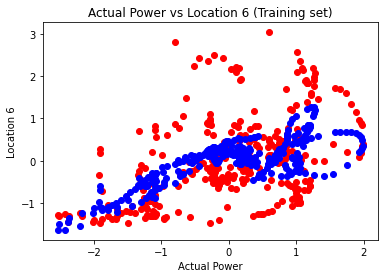

In [272]:
# Visualising the Scaled Training set results
plt.scatter(X_train[:, 3], y_train, color='red')
plt.plot(X_train[:, 3], y_modeled8, 'bo')
plt.title('Actual Power vs Location 6 (Training set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

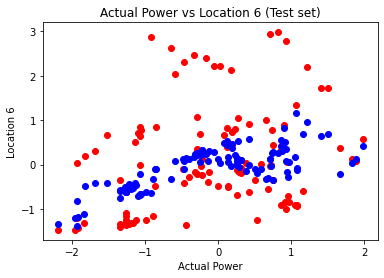

In [273]:
# Visualising the Scaled Test set results
plt.scatter(X_test[:, 3], y_test, color='red')
plt.plot(X_test[:, 3], y_pred8, 'bo')
plt.title('Actual Power vs Location 6 (Test set)')
plt.xlabel('Actual Power')
plt.ylabel('Location 6')
plt.show()

    Розглянувши всі бажані нейронні мережі, проведемр їхнє зворотне шкалювання.

In [274]:
# Feature Inverse Scaling
X_train=scalerX.inverse_transform(X_train)
y_train=scalerY.inverse_transform(y_train)

y_modeled1=scalerY.inverse_transform(y_modeled1)
y_modeled2=scalerY.inverse_transform(y_modeled2)
y_modeled3=scalerY.inverse_transform(y_modeled3)
y_modeled4=scalerY.inverse_transform(y_modeled4)
y_modeled5=scalerY.inverse_transform(y_modeled5)
y_modeled6=scalerY.inverse_transform(y_modeled6)
y_modeled7=scalerY.inverse_transform(y_modeled7)
y_modeled8=scalerY.inverse_transform(y_modeled8)

X_test=scalerX.inverse_transform(X_test)
y_test=scalerY.inverse_transform(y_test)

y_pred1=scalerY.inverse_transform(y_pred1)
y_pred2=scalerY.inverse_transform(y_pred2)
y_pred3=scalerY.inverse_transform(y_pred3)
y_pred4=scalerY.inverse_transform(y_pred4)
y_pred5=scalerY.inverse_transform(y_pred5)
y_pred6=scalerY.inverse_transform(y_pred6)
y_pred7=scalerY.inverse_transform(y_pred7)
y_pred8=scalerY.inverse_transform(y_pred8)

    Тепер для зворотно шкальованих реальних і модельних даних розрахуємо метрику якості MSE для навчальної і тестової вибірки.

In [275]:
# Mean Squared Error
from sklearn.metrics import mean_squared_error
print("Mean Squared Error:")

rnn1_metrics=['5-5-1-rnn', np.nan, np.nan]
rnn1_metrics.append(mean_squared_error(y_modeled1, y_train))
rnn1_metrics.append(mean_squared_error(y_pred1, y_test))
print("5-5-1 RNN")
print(mean_squared_error(y_modeled1, y_train), mean_squared_error(y_pred1, y_test))

rnn2_metrics=['5-5-5-1-rnn', np.nan, np.nan]
rnn2_metrics.append(mean_squared_error(y_modeled2, y_train))
rnn2_metrics.append(mean_squared_error(y_pred2, y_test))
print("5-5-5-1 RNN")
print(mean_squared_error(y_modeled2, y_train), mean_squared_error(y_pred2, y_test))

rnn3_metrics=['5-10-1-rnn', np.nan, np.nan]
rnn3_metrics.append(mean_squared_error(y_modeled3, y_train))
rnn3_metrics.append(mean_squared_error(y_pred3, y_test))
print("5-10-1 RNN")
print(mean_squared_error(y_modeled3, y_train), mean_squared_error(y_pred3, y_test))

rnn4_metrics=['5-10-10-1-rnn', np.nan, np.nan]
rnn4_metrics.append(mean_squared_error(y_modeled4, y_train))
rnn4_metrics.append(mean_squared_error(y_pred4, y_test))
print("5-10-10-1 RNN")
print(mean_squared_error(y_modeled4, y_train), mean_squared_error(y_pred4, y_test))

rnn5_metrics=['2-2-1-rnn', np.nan, np.nan]
rnn5_metrics.append(mean_squared_error(y_modeled5, y_train))
rnn5_metrics.append(mean_squared_error(y_pred5, y_test))
print("2-2-1 RNN")
print(mean_squared_error(y_modeled5, y_train), mean_squared_error(y_pred5, y_test))

rnn6_metrics=['2-2-2-1-rnn', np.nan, np.nan]
rnn6_metrics.append(mean_squared_error(y_modeled6, y_train))
rnn6_metrics.append(mean_squared_error(y_pred6, y_test))
print("2-2-2-1 RNN")
print(mean_squared_error(y_modeled6, y_train), mean_squared_error(y_pred6, y_test))

rnn7_metrics=['2-4-1-rnn', np.nan, np.nan]
rnn7_metrics.append(mean_squared_error(y_modeled7, y_train))
rnn7_metrics.append(mean_squared_error(y_pred7, y_test))
print("2-4-1 RNN")
print(mean_squared_error(y_modeled7, y_train), mean_squared_error(y_pred7, y_test))

rnn8_metrics=['2-4-4-1-rnn', np.nan, np.nan]
rnn8_metrics.append(mean_squared_error(y_modeled8, y_train))
rnn8_metrics.append(mean_squared_error(y_pred8, y_test))
print("2-4-4-1 RNN")
print(mean_squared_error(y_modeled8, y_train), mean_squared_error(y_pred8, y_test))

Mean Squared Error:
5-5-1 RNN
40.265768282191004 62.96345406163355
5-5-5-1 RNN
28.008131321388017 50.40308451524717
5-10-1 RNN
30.7674866077371 52.615887242844984
5-10-10-1 RNN
24.69755258213847 48.714128137220314
2-2-1 RNN
56.22632513777549 93.52711269421287
2-2-2-1 RNN
56.33996047028108 89.59854052290902
2-4-1 RNN
59.260570133849185 96.2317952106632
2-4-4-1 RNN
52.717258034383654 88.13360202232852


        Доповнимо датафрейм з метриками якості нейронних мереж і за допомогою цього оцінимо та порівняємо якість створених моделей.

In [276]:
for to_append in [rnn1_metrics, rnn2_metrics, rnn3_metrics, rnn4_metrics, rnn5_metrics, rnn6_metrics, rnn7_metrics, rnn8_metrics]:
    a_series=pd.Series(to_append, index=metrics_df.columns)
    metrics_df=metrics_df.append(a_series, ignore_index=True)
metrics_df.iloc[9:]

,model,train_r2,test_r2,train_mse,test_mse
9,5-5-1-rnn,NaN,NaN,40.265768,62.963454
10,5-5-5-1-rnn,NaN,NaN,28.008131,50.403085
11,5-10-1-rnn,NaN,NaN,30.767487,52.615887
12,5-10-10-1-rnn,NaN,NaN,24.697553,48.714128
13,2-2-1-rnn,NaN,NaN,56.226325,93.527113
14,2-2-2-1-rnn,NaN,NaN,56.339960,89.598541
15,2-4-1-rnn,NaN,NaN,59.260570,96.231795
16,2-4-4-1-rnn,NaN,NaN,52.717258,88.133602


    Можна побачити, що найменше значення і навчальної, і тестової MSE має нейронна мережа 5-10-10-1. Саме тому вона є безумовно найкращою серед розглянутих нейронних мереж. Проте варто також порівняти її з попередніми моделями.

In [277]:
metrics_df

,model,train_r2,test_r2,train_mse,test_mse
0,sr,0.209457,0.058663,61.675741,99.633196
1,mr,0.256283,0.165448,58.022451,88.330845
2,pr,0.218420,0.083147,60.976428,97.041684
3,omr,0.210086,0.050350,61.626635,100.513033
4,sdt,0.385226,0.040926,47.962783,101.510440
5,dt,0.647946,0.622936,27.466140,39.909322
6,rf,0.928176,0.574322,5.603484,45.054708
7,odt,0.479934,0.037733,40.573954,101.848435
8,orf,0.888142,0.056560,8.726814,99.855707
9,5-5-1-rnn,NaN,NaN,40.265768,62.963454


    Можна побачити, що більшість за метрикою MSE для тестової вибірки найкращою є модель дерева рішень для всіх факторних змінних dt. Разом з тим, порівняно з усім масивом моделей, найкраща нейронна мережа 5-10-10-1 є доволі непоганою, хоча поступається не тільки моделі dt за тествою MSE, але також моделі випадкового лісу на всіх змінних rf.
    Таким чином найкращими моделями за критерієм MSE для тестової вибірки є модель дерева рішень на всіх змінних dt, модель випадкового лісу на всіх змінних rf і нейронна мережа 5-10-10-1 у відповідному порядку. Разорм з тим, якість цих моделей все ще не є дуже високою, хоча й кращою за інші розглянуті моделі.
    У такому випадку варто шукати інші способи досягнення високої якості моделі для можливості збільшення її якості та подальшого практичного застосування. Такі способи можливі й для даних моделей і наявних даних, наприклад можна спробувати логарифмізувати деякі змінні або розглянути змінну Max Capacity як якісну через невелике число значень, що вона приймає, розглянути інші параметри для створюваних моделей, але все це є дуже трудомістким і тому в цій роботі розглянуто тільки певні моделі, які отримали показали не досить добрий результат (хоча причина також може полягати в даних).
    Також можна розглянути інші типи моделей, що не є завданням цієї роботи, але для забезпечення такої можливості експортуємо датафрейм метрик розглядуваних моделей.

In [278]:
# Exporting dataset with metrics
metrics_df.to_csv('Metrics (Tomilovych, EC-61).csv', sep=',', index=False)